# About Dataset
## Context
This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

## Content
price price in US dollars 326--18,823

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)

# checklist

1. impute zero rows especially x,y,z rows
2. y and z have some dimensional outliers in our dataset that need to be eliminated
3. the depth should be capped, but we must examine the regression line with price to be sure 
4. the table feature should be caped too
5. feature scaling of numerical values
6. Create new features based on domain knowledge or insights from the data. For example, you could calculate the volume of the diamond using the x, y, and z dimensions
7. create a new feature indicating whether the diamond has ideal proportions based on the depth and table.
8.  Normalize numerical features to a standard range, such as [0, 1] or [-1, 1]. This can help prevent features with large values from dominating the learning algorithm.
9. Binning: Convert numerical features into categorical features by binning them into discrete intervals. For example, you could bin the carat feature into categories like "small," "medium," and "large."

# Get the Data

## Download the Data

In [1]:
import numpy as np
import pandas as pd

X_train = pd.read_csv("https://raw.githubusercontent.com/Khalidallam222/SHAI-Khalid-Allam/main/Task%207%3A%20end%20to%20end%20ML%20Project/train.csv")
X_test = pd.read_csv("https://raw.githubusercontent.com/Khalidallam222/SHAI-Khalid-Allam/main/Task%207%3A%20end%20to%20end%20ML%20Project/test.csv")

## Take a Quick Look at the Data Structure


In [2]:
X_train.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [3]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [4]:
X_train.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


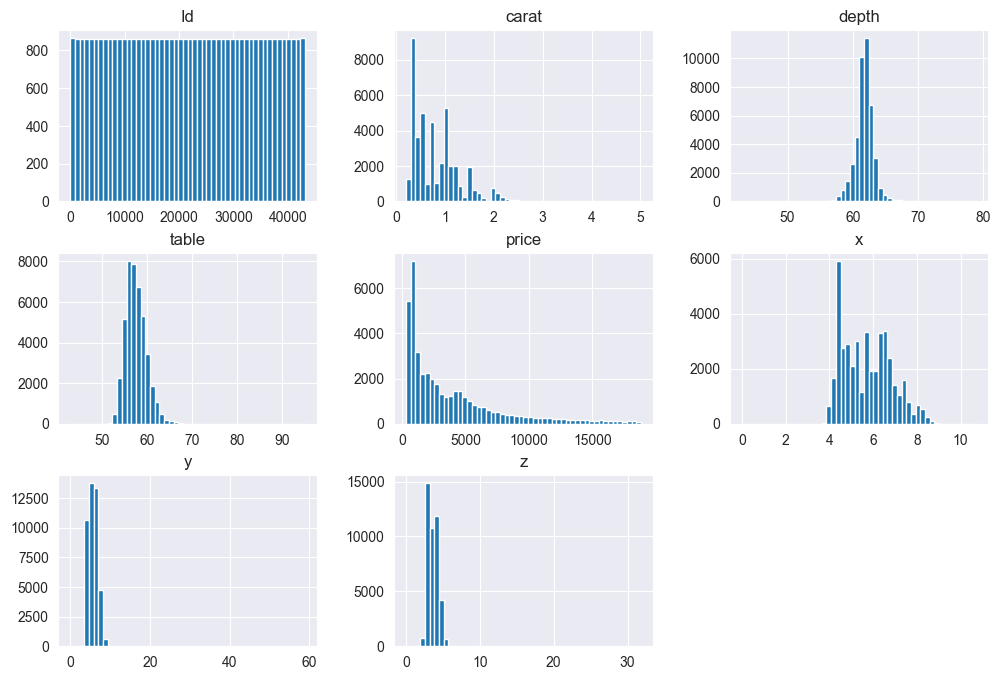

In [5]:
import matplotlib.pyplot as plt
X_train.hist(bins=50, figsize=(12, 8))
plt.show()

In [6]:
X_train = X_train[(X_train['x'] != 0) & (X_train['y'] != 0) & (X_train['z'] != 0)]

In [7]:
X_train['color'].value_counts()

color
G    9053
E    7832
F    7630
H    6645
D    5421
I    4264
J    2290
Name: count, dtype: int64

In [8]:
X_train['clarity'].value_counts()

clarity
SI1     10426
VS2      9821
SI2      7424
VS1      6474
VVS2     4041
VVS1     2904
IF       1442
I1        603
Name: count, dtype: int64

In [9]:
X_train['cut'].value_counts()

cut
Ideal        17201
Premium      11103
Very Good     9657
Good          3878
Fair          1296
Name: count, dtype: int64

# Discover and Visualize the Data to Gain Insights

In [10]:
diamonds = X_train.copy()
diamonds.drop("Id", inplace=True, axis=1)

In [11]:
diamonds[(diamonds['x'] == 0) | (diamonds['y'] == 0) | (diamonds['z'] == 0)]

,carat,cut,color,clarity,depth,table,price,x,y,z


## Looking for Correlations

In [12]:
corr_matrix = diamonds.corr(numeric_only=True)
corr_matrix['price'].sort_values(ascending=False)

price    1.000000
carat    0.921872
x        0.887172
z        0.864861
y        0.862936
table    0.128571
depth   -0.013225
Name: price, dtype: float64

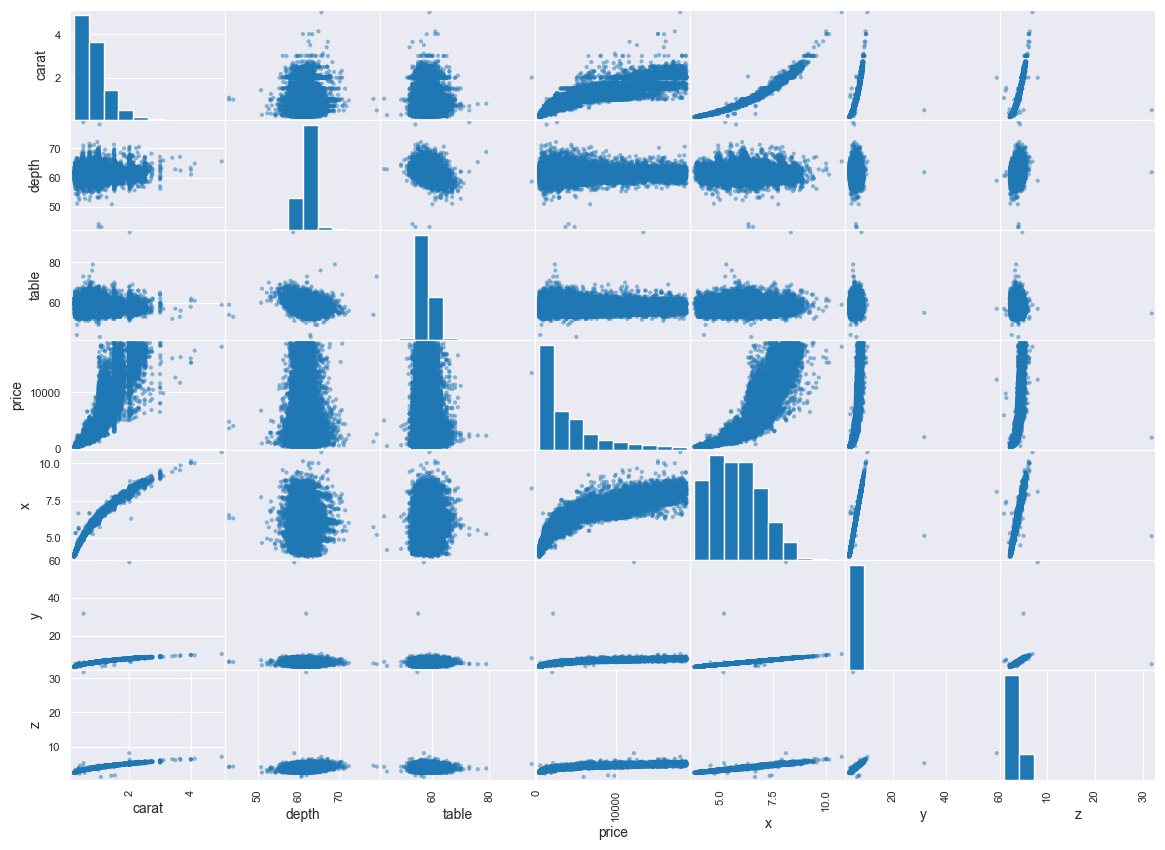

In [13]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]
scatter_matrix(diamonds, figsize=(14, 10))
plt.show()

<Axes: >

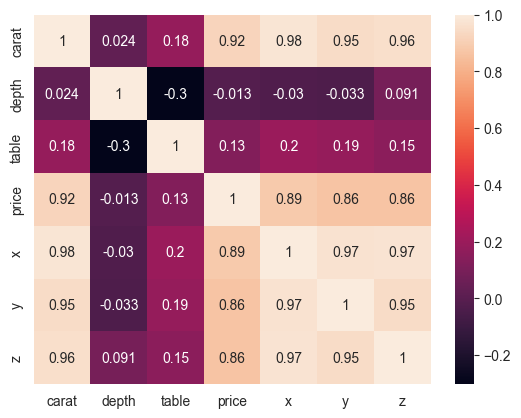

In [14]:
import seaborn as sns
sns.heatmap(corr_matrix, annot=True)

# Prepare the Data for Machine Learning Algorithms

In [15]:
diamonds = diamonds.drop("price", axis=1)
diamonds_labels = X_train["price"].copy()

## Transformation Pipelines

In [16]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OrdinalEncoder
from sklearn.pipeline import make_pipeline


def columns_mul(X):
    return X[:, [0]] * X[:, [1]] * X[:, [2]]

def mul_name(function_transformer, feature_names_in):
    return ["volume"]  # feature names out

def mul_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(columns_mul, feature_names_out=mul_name),
        StandardScaler())


preprocessing = ColumnTransformer([
        ("volume", mul_pipeline(), ['x', 'y', 'z']),
        ("cut_cat", OrdinalEncoder(categories=[['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']]), ['cut']),
        ("color_cat", OrdinalEncoder(categories=[['J', 'I', 'H', 'G', 'F', 'E', 'D']]), ['color']),
        ("clarity_cat", OrdinalEncoder(categories=[['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']]), ['clarity']),
    ],
    remainder=StandardScaler()) 

In [17]:
diamonds_prepared = preprocessing.fit_transform(diamonds)
diamonds_prepared = pd.DataFrame(diamonds_prepared, columns=preprocessing.get_feature_names_out(), index=diamonds.index)
diamonds_prepared.head()

,volume__volume,cut_cat__cut,color_cat__color,clarity_cat__clarity,remainder__carat,remainder__depth,remainder__table
0,0.592663,4.0,1.0,1.0,0.554429,0.036663,-0.205037
1,1.489459,3.0,3.0,5.0,1.505160,-0.590482,0.242716
2,-0.979218,4.0,4.0,3.0,-1.008997,-0.311751,-0.652790
3,-0.553236,4.0,3.0,3.0,-0.565322,-0.381434,-0.652790
4,-0.185620,3.0,2.0,5.0,-0.206157,-0.520800,-0.205037


# Select and Train a Model

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, diamonds, diamonds_labels,
                                scoring="neg_root_mean_squared_error", cv=10)
pd.Series(forest_rmses).describe()


count     10.000000
mean     545.751391
std       18.477087
min      523.316537
25%      534.642326
50%      540.868848
75%      555.322476
max      580.240103
dtype: float64

In [26]:
forest_reg.steps

[('columntransformer',
  ColumnTransformer(remainder=StandardScaler(),
                    transformers=[('volume',
                                   Pipeline(steps=[('simpleimputer',
                                                    SimpleImputer(strategy='median')),
                                                   ('functiontransformer',
                                                    FunctionTransformer(feature_names_out=<function mul_name at 0x7209983dc160>,
                                                                        func=<function columns_mul at 0x720929469090>)),
                                                   ('standardscaler',
                                                    StandardScaler())]),
                                   ['x', 'y', 'z']),
                                  ('cut_cat',
                                   OrdinalEncoder(categories=[['Fair', 'Good',
                                                               'Very Good',
      

# Fine-Tune Your Model

In [28]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint



# Define the parameter distributions
param_distribs = {
    "randomforestregressor__n_estimators": randint(100, 1000),
    "randomforestregressor__max_features": randint(1, 10),
    "randomforestregressor__max_depth": [None] + list(np.arange(10, 110, 10))
}

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=forest_reg,
    param_distributions=param_distribs,
    n_iter=10,
    scoring="neg_mean_squared_error",  # Define the scoring metric
    cv=3,  # Number of cross-validation folds
    random_state=42  # Random state for reproducibility
)

# Fit the RandomizedSearchCV object to the data
random_search.fit(diamonds, diamonds_labels)

# Print the best parameters found
print("Best parameters:", random_search.best_params_)

Best parameters: {'randomforestregressor__max_depth': 60, 'randomforestregressor__max_features': 4, 'randomforestregressor__n_estimators': 960}


In [30]:
# Evaluate the best model on the train set
best_model = random_search.best_estimator_
forest_rmses = -cross_val_score(best_model, diamonds, diamonds_labels,
                                scoring="neg_root_mean_squared_error", cv=10)
pd.Series(forest_rmses).describe()

count     10.000000
mean     534.622156
std       18.402934
min      512.109928
25%      521.379363
50%      533.274342
75%      543.996458
max      564.974364
dtype: float64